# Evolutionary Strategy で Neural Network を学習させる

In [1]:
# gym の読み込み
import gym

## openai gym の基本的な動かし方

In [2]:
env = gym.make('CartPole-v0')

# 初期化
env.reset()

# 時間ステップを進める
for _ in range(10):
  # env.render() # Google Colab では使えません
  action = env.action_space.sample() # ランダムに用意された行動から一つ選ぶ
  observation, reward, done, info = env.step(action)
  print(observation, reward, done)

env.close()

[-0.03419326  0.17148673  0.02054254 -0.30995137] 1.0 False
[-0.03076353 -0.02392179  0.01434352 -0.01086135] 1.0 False
[-0.03124197 -0.21924648  0.01412629  0.2863124 ] 1.0 False
[-0.03562689 -0.41456701  0.01985254  0.58341696] 1.0 False
[-0.04391824 -0.60996138  0.03152088  0.88228701] 1.0 False
[-0.05611746 -0.4152814   0.04916662  0.5996777 ] 1.0 False
[-0.06442309 -0.61105549  0.06116017  0.90743313] 1.0 False
[-0.0766442  -0.41681247  0.07930883  0.63458326] 1.0 False
[-0.08498045 -0.22288111  0.0920005   0.36789294] 1.0 False
[-0.08943807 -0.02917864  0.09935836  0.10557802] 1.0 False


## ニューラルネットワークのパラメータ

In [8]:
env.action_space.n

2

In [17]:
import gym
import numpy as np

env = gym.make('CartPole-v0')
pvariance = 0.1
ppvariance = 0.02

# the number of inputs and outputs depends on the problem
# we assume that observations consist of vectors of continuous value
# and that actions can be vectors of continuous values or discrete actions

ninputs = env.observation_space.shape[0] # 4
if (isinstance(env.action_space, gym.spaces.box.Box)):
    noutputs = env.action_space.shape[0]
else:
    noutputs = env.action_space.n
# initialize the training parameters randomly by using a gaussian
# distribution with average 0.0 and variance 0.1
# biases (thresholds) are initialized to 0.0
# variance of initial parameters
# variance of perturbations
# number of internal neurons
ninputs  = 4
noutputs = 2
nhiddens = 5
W1 = np.random.randn(nhiddens,ninputs) * pvariance
# randn は平均0 分散1の乱数を生成する関数
W2 = np.random.randn(noutputs, nhiddens) * pvariance

b1 = np.zeros(shape=(nhiddens, 1))

b2 = np.zeros(shape=(noutputs, 1))


In [11]:
import numpy as np
np.random.randn(2,2)

array([[-0.44373096, -0.60745989],
       [-0.11280379, -1.09807972]])

In [13]:
b1 = np.zeros(shape=(5, 1))
print(b1)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]


ニューラルネットワークの層ごとの計算

$$
Z_1 = W_1 x + b_1 \\
A_1 = f(Z_1) \\
Z_2 = W_2 A_1 + b_2 \\
A_2 = f(Z_2)
$$

In [18]:

# convert the observation array into a matrix with 1 column and ninputs rows
observation.resize(ninputs,1)
# compute the netinput of the first layer of neurons
Z1 = np.dot(W1, observation) + b1
# compute the activation of the first layer of neurons with the tanh function
A1 = np.tanh(Z1)
# compute the netinput of the second layer of neurons
Z2 = np.dot(W2, A1) + b2
# compute the activation of the second layer of neurons with the tanh function
A2 = np.tanh(Z2)
# if the action is discrete
#  select the action that corresponds to the most activated unit
if (isinstance(env.action_space, gym.spaces.box.Box)):
    action = A2
else:
    action = np.argmax(A2) 

In [35]:
# np.argmax は最も大きい数のインデックスを返す
a = np.array([1,2,8,100,3,4])
np.argmax(a)

3

In [20]:
print(A2) # 行動に応じたニューロン
print(np.argmax(A2)) #値の大きい方は？

[[-1.7498395e-03]
 [ 4.8318148e-05]]
1


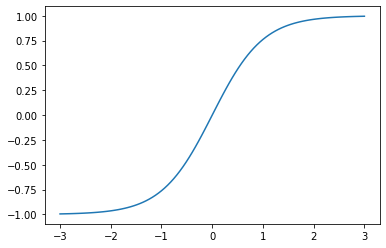

In [34]:
# ハイパボリックタンジェント関数

import matplotlib.pyplot as plt

x = np.linspace(-3,3,100) # -3 から 3 まで100個の数字を用意してください
y = np.tanh(x)

plt.plot(x,y)

## ニューラルネットが決めた行動で環境を動かす

In [21]:
def calc_action(obs):
  # convert the observation array into a matrix with 1 column and ninputs rows
  observation.resize(ninputs,1)
  # compute the netinput of the first layer of neurons
  Z1 = np.dot(W1, observation) + b1
  # compute the activation of the first layer of neurons with the tanh function
  A1 = np.tanh(Z1)
  # compute the netinput of the second layer of neurons
  Z2 = np.dot(W2, A1) + b2
  # compute the activation of the second layer of neurons with the tanh function
  A2 = np.tanh(Z2)
  # if the action is discrete
  #  select the action that corresponds to the most activated unit
  if (isinstance(env.action_space, gym.spaces.box.Box)):
      action = A2
  else:
      action = np.argmax(A2)   
  
  return action

In [22]:
env = gym.make('CartPole-v0')

# 初期化
observation = env.reset()

# 時間ステップを進める
reward_all = 0 # reward の和を記録する変数
for _ in range(200):
  # env.render() # Google Colab では使えません
  action = calc_action(observation)
  observation, reward, done, info = env.step(action)
  reward_all += reward
  if done==True: #棒が倒れたらそこで終わり
    break

env.close()

## 環境の実行を関数化する

In [30]:
def calc_action(obs, W1, W2, b1, b2):
  # convert the observation array into a matrix with 1 column and ninputs rows
  observation.resize(ninputs,1)
  # compute the netinput of the first layer of neurons
  Z1 = np.dot(W1, observation) + b1
  # compute the activation of the first layer of neurons with the tanh function
  A1 = np.tanh(Z1)
  # compute the netinput of the second layer of neurons
  Z2 = np.dot(W2, A1) + b2
  # compute the activation of the second layer of neurons with the tanh function
  A2 = np.tanh(Z2)
  # if the action is discrete
  #  select the action that corresponds to the most activated unit
  if (isinstance(env.action_space, gym.spaces.box.Box)):
      action = A2
  else:
      action = np.argmax(A2)   
  
  return action

In [31]:
def func_F(W1, W2, b1, b2):


  env = gym.make('CartPole-v0')

  # 初期化
  observation = env.reset()

  # 時間ステップを進める
  reward_all = 0
  for _ in range(200):
    # env.render() # Google Colab では使えません
    action = calc_action(observation, W1, W2, b1, b2)
    observation, reward, done, info = env.step(action)
    reward_all += reward
    if done==True:
      break
  
  return reward_all

env.close()

In [23]:
# パラメータのための行列 theta
n_population = 10
theta = np.random.randn(n_population, 37)

In [24]:
theta[0]

array([-1.17873719,  0.62938172, -0.00862496,  0.75447647, -1.09330439,
       -0.08567218,  0.86732047, -0.52671125,  0.31135714,  0.42252918,
        0.15203462, -2.03775323, -0.27521688,  0.09170671,  0.64958522,
        0.34159988, -0.89239471,  0.04560659, -0.14189205, -0.15372331,
        0.93520041,  0.13433121, -0.72332149,  0.37065918, -0.19759117,
       -2.23063157,  0.53663458, -0.03522272,  1.57387912, -1.48265637,
        1.11386551, -0.4037048 ,  1.75401261, -0.37063821,  0.95423953,
        0.52573419,  2.23378893])

In [25]:
W1 = theta[0,0:20].reshape(5,4)
W1

array([[-1.17873719,  0.62938172, -0.00862496,  0.75447647],
       [-1.09330439, -0.08567218,  0.86732047, -0.52671125],
       [ 0.31135714,  0.42252918,  0.15203462, -2.03775323],
       [-0.27521688,  0.09170671,  0.64958522,  0.34159988],
       [-0.89239471,  0.04560659, -0.14189205, -0.15372331]])

In [26]:
# i番の個体のパラメータを取り出したい
i = 3
W1 = theta[i,0:20].reshape(5,4)
W2 = theta[i,20:30].reshape(2,5)
b1 = theta[i,30:35].reshape(5,1)
b2 = theta[i,35:37].reshape(2,1)

In [32]:
func_F(W1,W2,b1,b2)

10.0

In [33]:
# ランク付のための関数
x = np.array([3,1,6,4])
np.argsort(x)

array([1, 0, 3, 2])

## 進化的手法でNNのパラメータを学習させる

上のプログラムを参考に，進化的手法によるNNのパラメータ学習のプログラムを完成させてください．

パラメータの初期値は平均０，分散1の乱数で初期化していますが，うまくいかない場合には教科書のように初期値を設定してください．

In [ ]:
# パラメータ theta　の初期化
n_population = 10

theta = np.random.randn(n_population, 37)


## 世代のループ
for g in range(100):
  ## 個体のループ
  eval_score = np.zeros(n_popuration)
  for i in range(n_population):
    W1 = theta[i,0:20].reshape(5,4)
    W2 = theta[i,20:30].reshape(2,5)
    b1 = theta[i,30:35].reshape(5,1)
    b2 = theta[i,35:37].reshape(2,1)

    XXXXXXXXXXXXXXXXXXXXXXX
    xxxxxxxxxxxxxxxxxxxxxxx

  ## 遺伝子の入れ替え
  xxxxxxxxxxxxxxxxxxxxxxx
  XXXXXXXXXXXXXXXXXXXXXXX
  xxxxxxxxxxxxxxxxxxxxxxx

  ## もし評価がよければ終了
  xxxxxxxxxxxxxxxxxxxxxxx
  xxxxxxxxxxxxxxxxxxxxxxx
  xxxxxxxxxxxxxxxxxxxxxxx
